In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc


from regression_module import *
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
# Load Data Set
df = pd.read_csv('data/final_df.csv')

In [108]:
# Remove first two unnecessary columns from DF
df = df.iloc[:,2:]

In [109]:
# Assign target variable
y = df.churn
# Drop target variable from independent features DF
X = df.drop('churn', axis = 1)
# Save columns as list of strings for reassign after scaling
cols = X.columns

In [110]:
# Instantiate a scaling object from SKlearn
mm = MinMaxScaler()
# Fit_Transform the independent features DF to the min-max scaler
scaled_X = mm.fit_transform(X)

In [111]:
# Assign scaled dataset to pandas dataframe
scaled_df = pd.DataFrame(scaled_X)
# Reassign columns names to new dataframe
scaled_df.columns = cols

In [112]:
# Perform a train test split, maintaining test size sample and random state from logistic regression notebook
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = .25, random_state = 33)

# Baseline KNN Classifier (default parameters)

In [125]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [126]:
test_preds1 = knn1.predict(X_test)
knn1.score(X_test, y_test)

0.7529812606473595

In [127]:
print(f"Precision Score: {precision_score(y_test, test_preds1)}")
print(f"Recall Score: {recall_score(y_test, test_preds1)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds1)}")
print(f"F1 Score: {f1_score(y_test, test_preds1)}")

Precision Score: 0.5488069414316703
Recall Score: 0.5270833333333333
Accuracy Score: 0.7529812606473595
F1 Score: 0.5377258235919234


AUC Score: 0.682355093676815


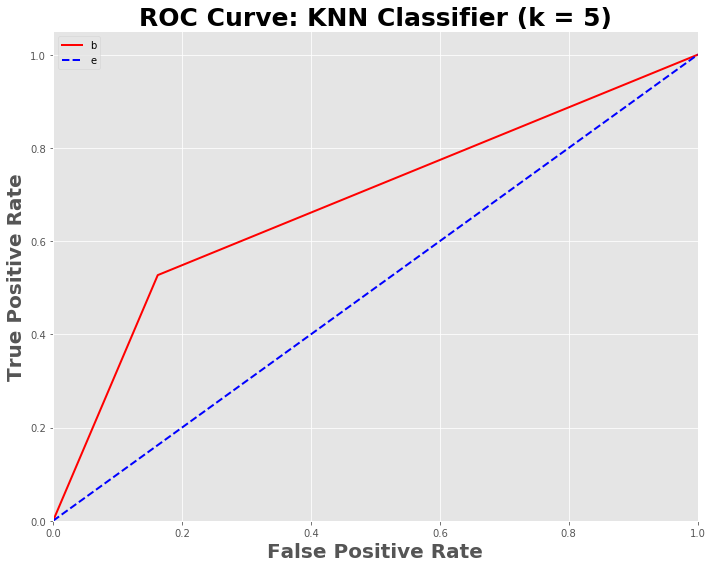

In [128]:
fpr, tpr, threshold = roc_curve(y_test, test_preds1)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {auc(fpr, tpr)}')

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, 'r', lw = 2, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1], 'b', linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: KNN Classifier (k = 5)', fontsize = 25, fontweight = 'bold')
plt.legend('best')
plt.tight_layout()

# Cross Val - KNN Classifier

In [129]:
knn_clf = KNeighborsClassifier()
knn_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 4)
mean_knn_cv_score = np.mean(knn_cv_score)
print(f"Mean Cross Validation Score: {mean_knn_cv_score :.2%}")

Mean Cross Validation Score: 77.04%


In [130]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,20)}
knn2_gscv = GridSearchCV(knn2, param_grid, cv = 4)
knn2_gscv.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [131]:
knn2_gscv.best_params_
knn2_gscv.best_score_

0.7890950397576676

In [132]:
test_preds2 = knn2_gscv.predict(X_test)

In [133]:
knn2_gscv.score(X_test,y_test)

0.7836456558773425

In [134]:
print(f"Precision Score: {precision_score(y_test, test_preds2)}")
print(f"Recall Score: {recall_score(y_test, test_preds2)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds2)}")
print(f"F1 Score: {f1_score(y_test, test_preds2)}")

Precision Score: 0.6306068601583114
Recall Score: 0.4979166666666667
Accuracy Score: 0.7836456558773425
F1 Score: 0.5564610011641443


AUC Score: 0.6943135245901639


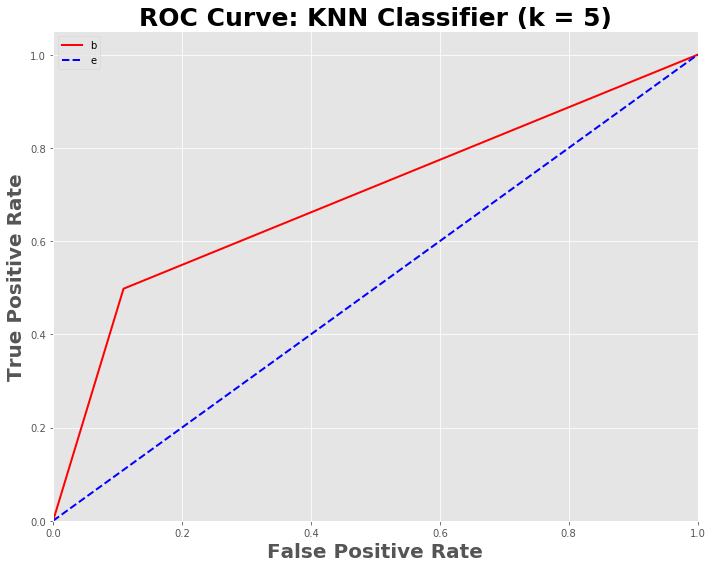

In [135]:
fpr, tpr, threshold = roc_curve(y_test, test_preds2)
roc_auc = auc(fpr, tpr)
print(f'AUC Score: {auc(fpr, tpr)}')

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, 'r', lw = 2, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1], 'b', linestyle = '--', lw = 2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate', fontsize = 20, fontweight = 'bold')
plt.ylabel('True Positive Rate', fontsize = 20, fontweight = 'bold')
plt.title('ROC Curve: KNN Classifier (k = 5)', fontsize = 25, fontweight = 'bold')
plt.legend('best')
plt.tight_layout()